In [369]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [370]:
data_train = pd.read_csv('Inputs/train.csv')
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [371]:
data_train.replace(['female', 'male'], [0, 1], inplace=True)
data_train.fillna(0, inplace=True)
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",1,0.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,C


In [372]:
X = np.array(data_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']])
Y = np.array(data_train[['Survived']])

# ***Model:***

---


* **Implement a Multi Layer Perceptron Neural Network for this classification task**

In [373]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((712, 6), (179, 6), (712, 1), (179, 1))

In [374]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='sigmoid'), # input layer
    tf.keras.layers.Dense(60, activation='relu'), # hidden layer 1
    tf.keras.layers.Dense(30, activation='sigmoid'), # hidden layer 2
    tf.keras.layers.Dense(2, activation='softmax'), # output layer
])

In [375]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics= ['accuracy'])

* **Fit your model on train dataset**

In [376]:
output = model.fit(X_train, Y_train, epochs=200)

Epoch 1/200


23/23 [==============================] - 1s 4ms/step - loss: 0.6293 - accuracy: 0.6404
Epoch 2/200
23/23 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.6629
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5920 - accuracy: 0.6756
Epoch 4/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.6713
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5722 - accuracy: 0.6545
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5824 - accuracy: 0.6770
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5856 - accuracy: 0.6812
Epoch 8/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.6966
Epoch 9/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5479 - accuracy: 0.7107
Epoch 10/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7008
Epoch 11/200
23/23 [=

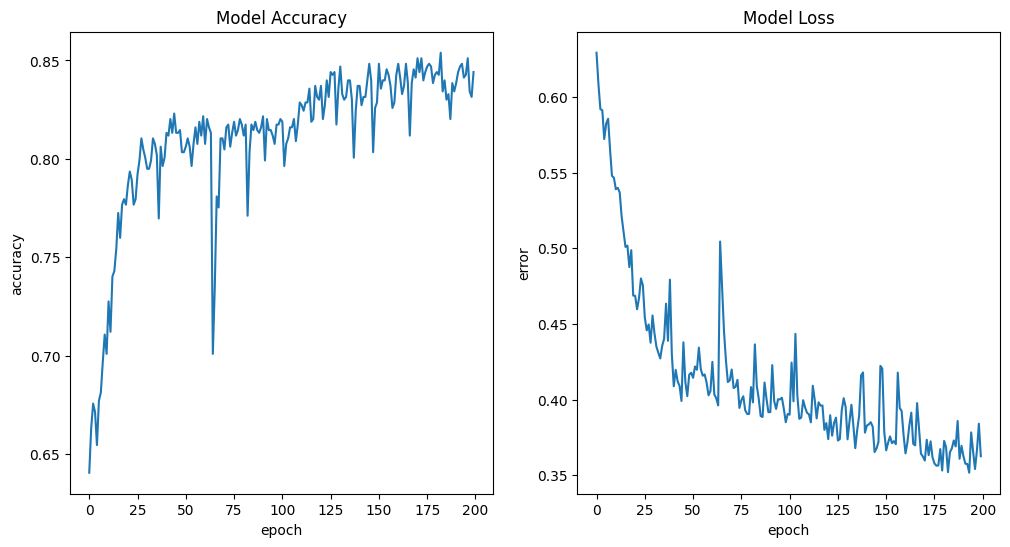

In [377]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.plot(output.history['accuracy'])
ax1.set_title("Model Accuracy")
ax1.set_xlabel("epoch")
ax1.set_ylabel("accuracy")

ax2.plot(output.history['loss'])
ax2.set_title("Model Loss")
ax2.set_xlabel("epoch")
ax2.set_ylabel("error")
plt.show()

* **Evaluate your model on test dataset (You should achieve an accuracy > 90%)**

In [378]:
results = model.evaluate(X_test, Y_test)
results

6/6 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.7821


[0.6006194353103638, 0.7821229100227356]

* **Calculate precision and recall**

* **Predict your model on Jack and Rose data**

* **Fill the following table**

|Algorithm|Accuracy|
|---|---|
|KNN|  |
|Perceptron|  |
|MLP|  |